In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [135]:
prod = pd.read_csv('data/world_production_new.csv')
prod.head()


,Country Code,Country Description,Year,ISIC,ISIC Description,Value,Quarter
0,8,Albania,2006,10,Food products,65.9,1
1,8,Albania,2006,11,Beverages,65.9,1
2,8,Albania,2006,12,Tobacco products,65.9,1
3,8,Albania,2006,13,Textiles,58.0,1
4,8,Albania,2006,14,Wearing apparel,58.0,1


I want to first take a look at the trend of the world's production rate over time. I will do this by creating a line graph that shows the production rate over time. I will also create a bar graph that shows the production rate by country.

In [136]:
prod_mean = prod.groupby('Year')['Value'].mean()
prod_mean

Year
2005    111.632617
2006    111.631778
2007    114.597700
2008    111.709628
2009     97.696496
2010    153.514090
2011    123.580417
2012    121.249908
2013    104.031949
2014    101.226015
2015     99.999957
2016    103.314889
2017    106.819111
2018    110.494152
2019    113.180616
2020    106.423482
2021    116.422428
2022    121.043920
Name: Value, dtype: float64

Text(0, 0.5, 'Production')

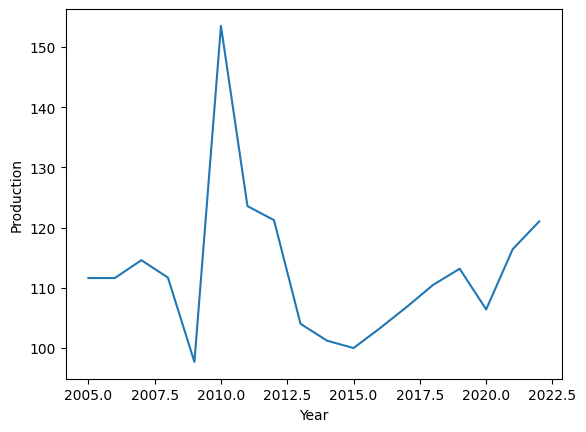

In [137]:
fig, ax = plt.subplots()
ax.plot(prod_mean.index, prod_mean.values)
ax.set_xlabel('Year')
ax.set_ylabel('Production')

This graph shows us that there really isn't a trend for the world's production rate, There's a big drop in 2008 and 2009 and that is most likely due to the 2008 recession and many companies not being able to afford workers and materials, but this is assuming the US is the only country that was affected by the recession. Then we see huge growth after the drop, skyrocketing to 150 in 2011. This is most likely due to the US recovering from the recession and other countries growing their production rates. After that there was a huge drop back down to around 100 in 2015 then a steady increase until 2019, when COVID-19 hit and caused another drop, but since then the world's production rate has been steadily increasing. 

Next I want to take a look a which countries have the highest production rates. I will do this by creating a bar graph that shows the production rate by country. So we can easily see which countries have the highest production rates and see what the trend is for each country so we can see the impact.

In [138]:
#will also create a bar graph that shows the production rate by country
prod_country = prod.groupby('Country Description')['Value'].mean().sort_values(ascending=True)
prod_country

Country Description
Mozambique                            82.636147
Nicaragua                             85.493524
Nigeria                               87.745135
Bolivia (Plurinational State of)      89.012429
China                                 91.222702
                                       ...     
Bangladesh                           135.704883
Rwanda                               144.689748
Armenia                              193.252101
Mongolia                             204.900111
Kazakhstan                          1130.492185
Name: Value, Length: 114, dtype: float64

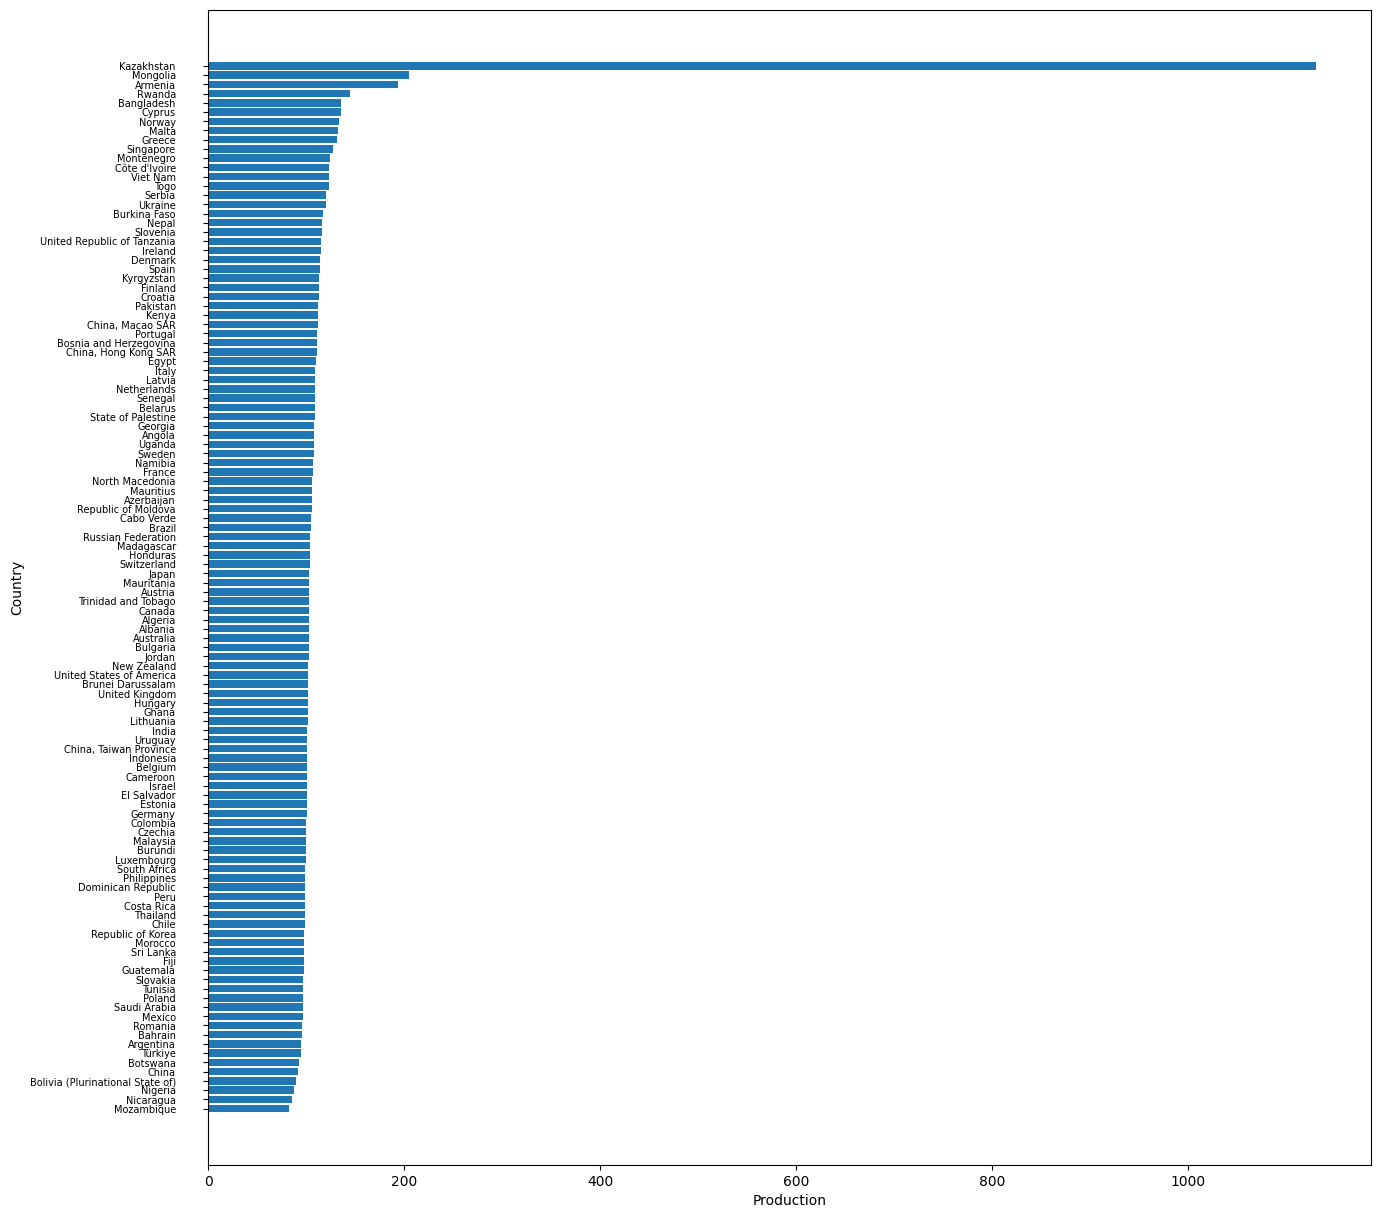

In [139]:
fig, ax = plt.subplots(figsize=(15,15))
ax.tick_params(axis='y', labelsize=7, pad=20)
ax.barh(prod_country.index, prod_country.values)
ax.set_xlabel('Production')
ax.set_ylabel('Country')
plt.show()



From first glance at the bar graph, we can already see there's a problem we need to address before we move forward in our Analysis. There's a huge outlier that we need to address in our data from the Country Kazakhstan. It has an overall production average of 1000 which seems very unlikely. So we will remove this outlier and then regraph the data. While doing this I also want to check for any other outliers that may be in our data. I'll calculate the IQR and then remove any outliers that are 1.5 times the IQR from the upper or lower bound or Q1 or Q3.

In [140]:
#Calculate the IQR 
q1 = prod_country.quantile(0.25)
q3 = prod_country.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(iqr)
print(upper)
print(lower)

outliers = prod_country[(prod_country > upper) | (prod_country < lower)]
prod_country = prod_country.drop(outliers.index)
prod_country


11.435562653540856
128.35330276908965
82.61105215492623


Country Description
Mozambique                           82.636147
Nicaragua                            85.493524
Nigeria                              87.745135
Bolivia (Plurinational State of)     89.012429
China                                91.222702
                                       ...    
Togo                                123.311696
Viet Nam                            123.425095
Côte d'Ivoire                       123.502574
Montenegro                          124.029735
Singapore                           127.487988
Name: Value, Length: 105, dtype: float64

After calculating the IQR in order to find the upper and lower bounds of our data and removing the outliers our data seems a lot more reasonable now without any extreme or unusual numbers. Now we can move forward with our analysis. Here's the plot of the data without the outliers.

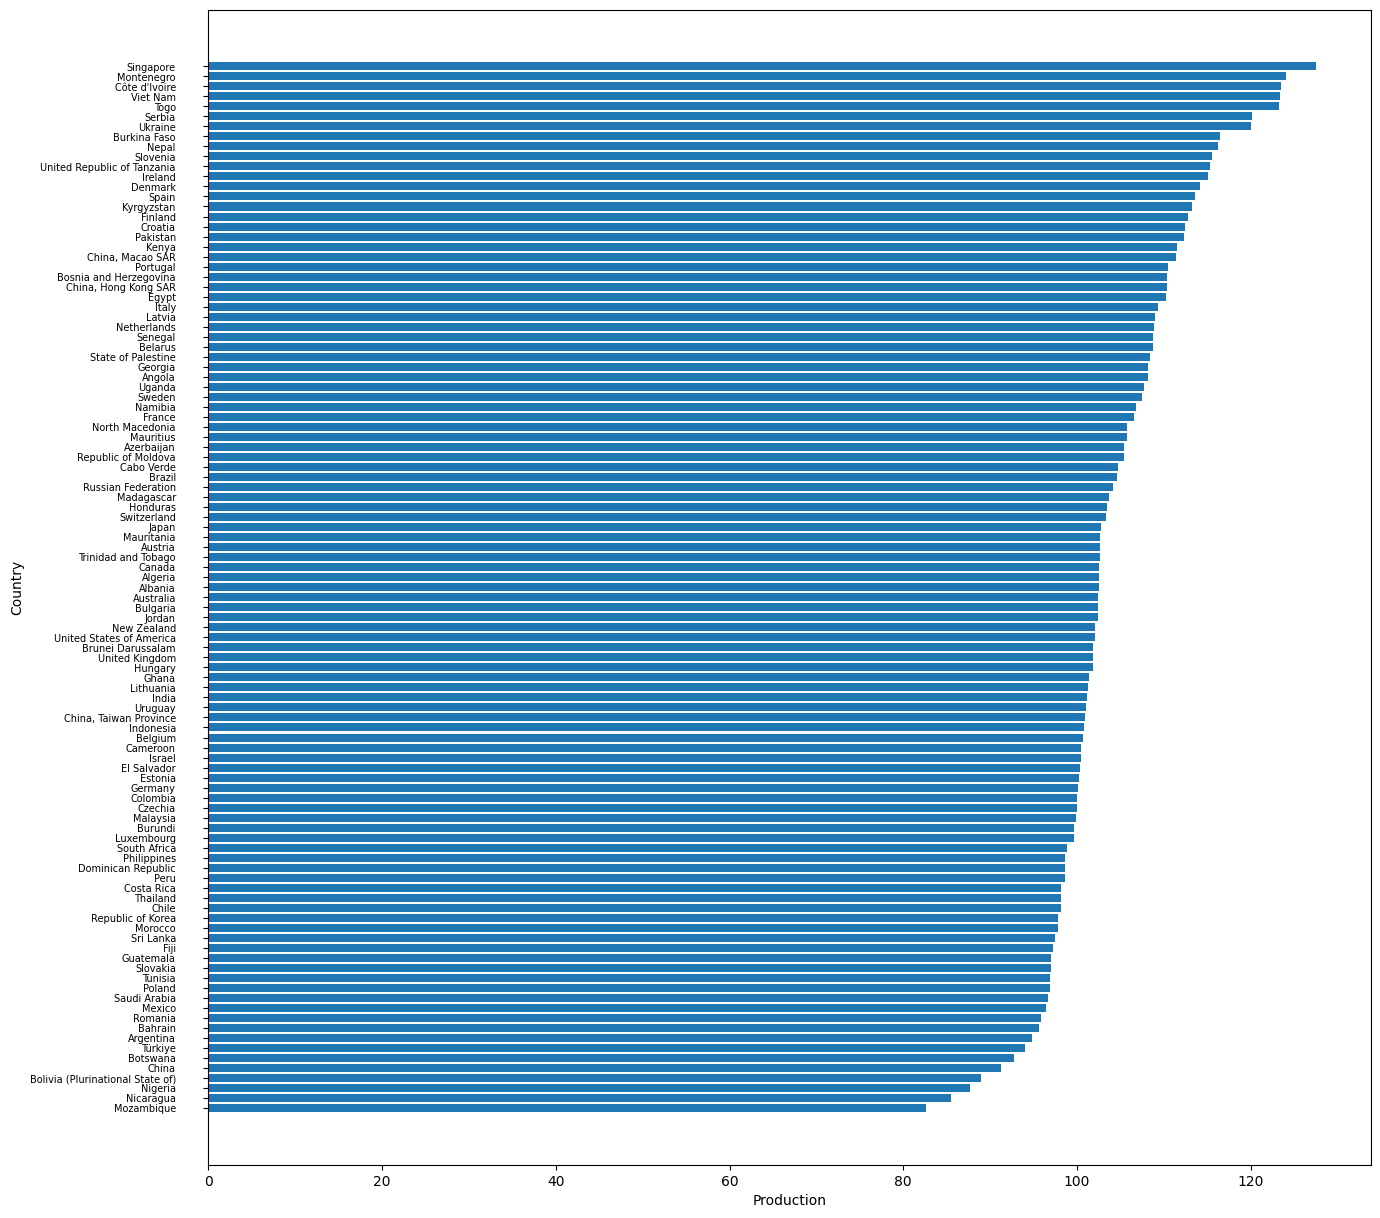

In [141]:
fig, ax = plt.subplots(figsize=(15,15))
ax.tick_params(axis='y', labelsize=7, pad=20)
ax.barh(prod_country.index, prod_country.values)
ax.set_xlabel('Production')
ax.set_ylabel('Country')
plt.show()


At our suprise Signapore actually has the highest average production rate across all of the other countries. We expected countries like China or Japan to top the charts but they are actually in the middle of the pack. This is very interesting and we will have to keep this in mind as we move forward with our analysis. If may be because we are looking at the average production rate and not the total production rate. So we will have to keep this in mind as we move forward with our analysis.

Next I want to take a look at the trend of the world's endangered species rate over time. I will do this by creating a line graph that shows the endangered species rate over time. I will also create a bar graph that shows the endangered species rate by country.

In [142]:
endangered = pd.read_csv('data/endangered_species_new.csv')
endangered_year.head()

,Year,Species Count
0,2007,141
1,2008,212
2,2009,179
3,2010,483
4,2011,346


Looking at this data in order to get the information we need we need to get the count of the number of endangered specicies each year. So we will need to group the data by year and then count the number of endangered species in each year. Then we can graph the data.

In [143]:
endangered_year = endangered.groupby('Year').count()
endangered_year = endangered_year.reset_index()
endangered_year = endangered_year[['Year', 'Scientific Name']]
endangered_year = endangered_year.rename(columns={'Scientific Name': 'Species Count'})
endangered_year


,Year,Species Count
0,2007,141
1,2008,212
2,2009,179
3,2010,483
4,2011,346
5,2012,412
6,2013,422
7,2014,400
8,2015,291
9,2016,754


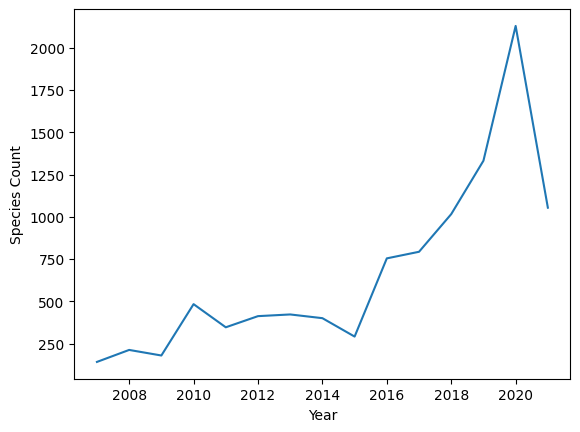

In [144]:
fig, ax = plt.subplots()
ax.plot(endangered_year['Year'], endangered_year['Species Count'])
ax.set_xlabel('Year')
ax.set_ylabel('Species Count')
plt.show()

Looking at the graph, we can see there's no trend with the number of endangered_species each year. The only notable event is in 2015 it began trend upwards and shot up until 2019 then saw a huge drop. Now that we've looked at both of these data-sets individually, we can now look at them together and see if there's any correlation between the two.

In [145]:
df = pd.merge(prod_mean, endangered_year, on='Year')
df


,Year,Value,Species Count
0,2007,114.597700,141
1,2008,111.709628,212
2,2009,97.696496,179
3,2010,153.514090,483
4,2011,123.580417,346
5,2012,121.249908,412
6,2013,104.031949,422
7,2014,101.226015,400
8,2015,99.999957,291
9,2016,103.314889,754


In [146]:
stats.pearsonr(df['Value'], df['Species Count'])

PearsonRResult(statistic=-0.05997727816279648, pvalue=0.8318506654317387)

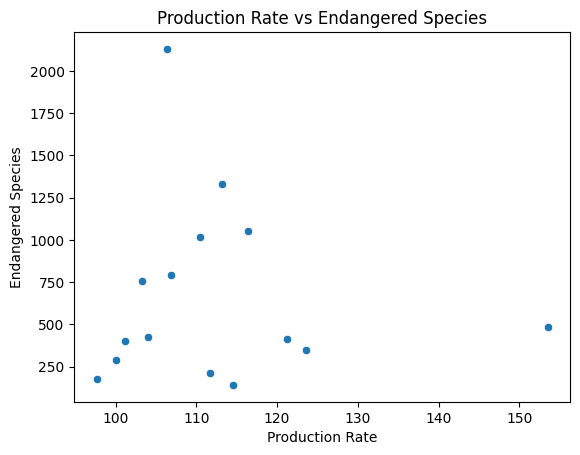

In [147]:
sns.scatterplot(data= df, x="Value", y="Species Count")
plt.title("Production Rate vs Endangered Species")
plt.xlabel("Production Rate")
plt.ylabel("Endangered Species")
plt.show()

I merge the two data-sets together and then ran a correlation test on the data. The statistic value we got was -0.0599. This means that there is a very weak negative correlation between the two data-sets. This means that as the world's production rate increases the number of endangered species decreases. This is very interesting and we will have to keep this in mind as we move forward with our analysis. Next we will run linear regression on the data to see if we can predict the number of endangered species based on the world's production rate.

In [148]:
import statsmodels.formula.api as smf
smf.ols(formula='Q("Species Count") ~ Q("Value")', data=df).fit().summary()


c:\Users\JohnL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Species Count")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                   0.04693
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.832
Time:                        16:32:46   Log-Likelihood:                -115.10
No. Observations:                  15   AIC:                             234.2
Df Residuals:                      13   BIC:                             235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    929.2138   1231.153      0.755      0.464   -1730.530    3588.958
Q("Value")    -2.3590     10.889     -0.217      0.832     -25.883      21.165
==============================================================================
Omnibus:                       10.030   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.246
Skew:                           1.397   Prob(JB):                       0.0440
Kurtosis:                       4.479   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the results of our Linear Regression our R^2 value was 0.004 which means confirms that there is barely any correlation between the two data-sets. This means that we can't predict the number of endangered species based on the world's production rate. This is very interesting and we will have to keep this in mind as we move forward with our analysis. Next we will run linear regression on the data to see if we can predict the world's production rate based on the number of endangered species.

<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

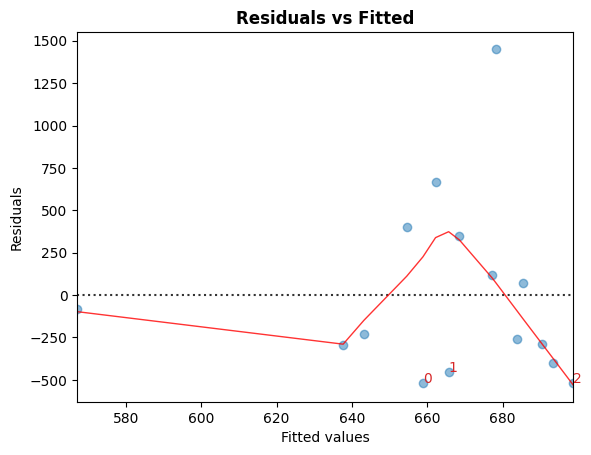

In [159]:
from utils import Linear_Reg_Diagnostic

model = smf.ols(formula='Q("Species Count") ~ Q("Value")', data=df).fit()
diag = Linear_Reg_Diagnostic(model)
diag.residual_plot()


In [160]:
model.summary()

c:\Users\JohnL\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Species Count")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                   0.04693
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.832
Time:                        16:38:01   Log-Likelihood:                -115.10
No. Observations:                  15   AIC:                             234.2
Df Residuals:                      13   BIC:                             235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    929.2138   1231.153      0.755      0.464   -1730.530    3588.958
Q("Value")    -2.3590     10.889     -0.217      0.832     -25.883      21.165
==============================================================================
Omnibus:                       10.030   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.246
Skew:                           1.397   Prob(JB):                       0.0440
Kurtosis:                       4.479   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: The R-squared value of 0.004 indicates that only 0.4% of the variance in the "Species Count" can be explained by the "Value" variable. This suggests that the model is not a good fit for the data.

F-statistic: The F-statistic of 0.04693 and the corresponding probability value of 0.832 indicate that the model is not statistically significant. This means that the "Value" variable is not a good predictor of the "Species Count".

Coefficients: The coefficient for the intercept is 929.2138, which means that if the "Value" is zero, the expected value of the "Species Count" is 929.2138. The coefficient for the "Value" variable is -2.3590, which means that for every one unit increase in the "Value" variable, the expected value of the "Species Count" decreases by 2.3590.

P-values: The P-values for both the intercept and the "Value" variable are not statistically significant at the 0.05 significance level, which means that they are not reliable predictors of the "Species Count".

Overall after doing our analysis we can conclude that there is no correlation between the world's production rate and the number of endangered species. Our original hypothesis was that as the world's production rate increases the number of endangered species decreases. This was proven to be false. We can also conclude that the world's production rate is not a good predictor of the number of endangered species. 